# Introduction to the NLSY79 dataset

#### We will see:

1. How to perform simple regressions
2. How to generate density plot
3. How to generate a heatmap

#### Background: 

Investigation of the wage dynamics in [The career decisions of young men](http://www.journals.uchicago.edu/doi/10.1086/262080) by Keane, M. P. and Wolpin, K. I. (1997).

$\rightarrow$ How persistent are the wage shocks?
* Perform wage regressions
* Use wage residuals where the effect of observable characteristics and common aggregate time trends have been eliminated
* Investigate persistence by 
    * Density plots
    * Coveariance matrix in a heatmaps


#### Sample selection in this analysis:

* White males aged 16 or less as of October 1, 1977
* Time dimension is measured in periods, i.e. period 0 begins once an individual has turned 16 by October
* 10 years of follow-up

# 1) Import packages
Importing packages in a notebook once is sufficient. 

In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices, dmatrix
import math
% matplotlib inline

C:\Users\Master\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# We ensure a proper formatting of the variables.
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
# Adjust the default options s.t. the full dataset can be viewed.
pd.set_option('display.max_columns', 100)


# 2) Import the dataset

In [4]:
df = pd.read_pickle('Data/nlsy_intro_data')

In [5]:
# show dataframe

df

Schooling    Choice      Wage  Log_wage  AFQT_1  GENDER  \
Identifier Period                                                            
6          6              16     White 14,062.67      9.55   99.00    1.00   
           7              16     White 15,921.17      9.68   99.00    1.00   
           8              16     White 18,602.73      9.83   99.00    1.00   
           9              16     White 19,693.95      9.89   99.00    1.00   
           10             16     White 20,611.00      9.93   99.00    1.00   
7          2              12      Blue 18,795.29      9.84   33.00    1.00   
           3              12  Military  9,647.86      9.17   33.00    1.00   
           4              12  Military  9,281.37      9.14   33.00    1.00   
           5              12  Military 10,994.15      9.31   33.00    1.00   
           6              12  Military 12,302.53      9.42   33.00    1.00   
           7              12  Military 12,804.15      9.46   33.00    1.00   
9          2              12      Blue  9,852.33      9.20   55.00    1.00   
           3              12      Blue  7,955.60      8.98   55.00    1.00   
           4              12      Blue  7,966.24      8.98   55.00    1.00   
           5              12      Blue  8,119.77      9.00   55.00    1.00   
           7              13     White 15,159.96      9.63   55.00    1.00   
           8              13     White 16,867.09      9.73   55.00    1.00   
15         6              16     White 14,091.96      9.55   83.00    1.00   
           7              16     White 16,857.34      9.73   83.00    1.00   
24         4              11      Blue 14,947.72      9.61   66.00    1.00   
26         4              14     White  7,268.95      8.89   96.00    1.00   
           5              14  Military 15,035.24      9.62   96.00    1.00   
           6              14  Military 12,079.75      9.40   96.00    1.00   
41         3              12      Blue 13,533.79      9.51   45.00    1.00   
           4              12      Blue 13,912.41      9.54   45.00    1.00   
           5              12      Blue 15,627.59      9.66   45.00    1.00   
           9              15     White 39,952.07     10.60   45.00    1.00   
42         4              12      Blue 17,887.21      9.79   20.00    1.00   
           5              12      Blue 20,578.31      9.93   20.00    1.00   
60         3              12      Blue 26,216.00     10.17   68.00    1.00   
...                      ...       ...       ...       ...     ...     ...   
12093      7              12      Blue 10,968.49      9.30   40.00    1.00   
12100      2              11     White  8,745.25      9.08   54.00    1.00   
           3              11      Blue 13,945.49      9.54   54.00    1.00   
           5              11      Blue 14,173.31      9.56   54.00    1.00   
           6              11     White  9,004.24      9.11   54.00    1.00   
           8              11     White 21,454.34      9.97   54.00    1.00   
           9              11      Blue 21,449.47      9.97   54.00    1.00   
12106      5              13     White  5,218.52      8.56   58.00    1.00   
           6              13      Blue  6,324.98      8.75   58.00    1.00   
12109      6              12      Blue 12,286.96      9.42   22.00    1.00   
12110      7              16     White 25,762.30     10.16   30.00    1.00   
12112      3              11      Blue  4,613.38      8.44   17.00    1.00   
           4              11      Blue  5,115.85      8.54   17.00    1.00   
           5              11      Blue 20,029.21      9.90   17.00    1.00   
           6              11      Blue 18,823.92      9.84   17.00    1.00   
           7              11      Blue 14,013.64      9.55   17.00    1.00   
           8              11      Blue 14,551.83      9.59   17.00    1.00   
           9              11      Blue 23,576.24     10.07   17.00    1.00   
12114      4              12      Blue 14

In [6]:
# Seperate the dataset by years

df_container = []
for i in range(0,11):
    df_container.append(df.loc[df['Period'] == i])
    df_container[i] = df_container[i].set_index('Identifier')


In [7]:
# show data_container for different years

df_container[8]

,Schooling,Choice,Wage,Log_wage,AFQT_1,GENDER,exper_blue,exper_white,exper_military,Age,Mother_edu,ROTTER_SCORE,ROSENBERG_SCORE,d_1977,d_1978,d_1979,d_1980,d_1981,d_1982,d_1983,d_1984,d_1985,d_1986,d_1987,d_1988,SURVEY_YEAR,Period
Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,
6,16,White,"18,602.73",9.83,99.00,1.00,0.00,2.00,0.00,24,12.00,12.00,27.00,0,0,0,0,0,0,0,0,1,0,0,0,1985,8
9,13,White,"16,867.09",9.73,55.00,1.00,4.00,1.00,0.00,24,12.00,4.00,26.00,0,0,0,0,0,0,0,0,0,0,1,0,1987,8
60,12,Blue,"32,489.17",10.39,68.00,1.00,5.00,0.00,0.00,24,12.00,5.00,29.00,0,0,0,0,0,0,0,0,1,0,0,0,1985,8
106,16,White,"23,450.98",10.06,98.00,1.00,0.00,1.00,0.00,24,12.00,6.00,20.00,0,0,0,0,0,0,0,0,1,0,0,0,1985,8
107,16,White,"16,354.60",9.70,67.00,1.00,0.00,2.00,0.00,24,11.00,7.00,22.00,0,0,0,0,0,0,0,0,0,1,0,0,1986,8
120,16,White,"66,216.48",11.10,98.00,1.00,1.00,1.00,0.00,24,16.00,9.00,18.00,0,0,0,0,0,0,0,0,0,1,0,0,1986,8
122,12,Blue,"26,113.45",10.17,63.00,1.00,5.00,0.00,0.00,24,11.00,8.00,22.00,0,0,0,0,0,0,0,0,0,1,0,0,1986,8
123,14,White,"17,524.92",9.77,90.00,1.00,1.00,3.00,0.00,24,16.00,12.00,19.00,0,0,0,0,0,0,0,0,0,1,0,0,1986,8
134,11,Blue,"25,069.79",10.13,46.00,1.00,7.00,0.00,0.00,24,9.00,7.00,25.00,0,0,0,0,0,0,0,0,1,0,0,0,1985,8


# 3) Explore the dataset

In [8]:
# number of individuals:

len(df.Identifier.unique())

1113

In [9]:
# describe the dataset

df.describe()


,Schooling,Wage,Log_wage,AFQT_1,GENDER,exper_blue,exper_white,exper_military,Age,Mother_edu,ROTTER_SCORE,ROSENBERG_SCORE,d_1977,d_1978,d_1979,d_1980,d_1981,d_1982,d_1983,d_1984,d_1985,d_1986,d_1987,d_1988,SURVEY_YEAR,Identifier,Period
count,"4,669.00","4,669.00","4,669.00","4,669.00","4,669.00","4,669.00","4,669.00","4,669.00","4,669.00","4,669.00","4,669.00","4,669.00","4,669.00","4,669.00","4,669.00","4,669.00","4,669.00","4,669.00","4,669.00","4,669.00","4,669.00","4,669.00","4,669.00","4,669.00","4,669.00","4,669.00","4,669.00"
mean,12.25,"17,219.54",9.61,47.00,1.00,1.67,0.61,0.27,21.82,11.73,8.67,22.10,0.00,0.01,0.02,0.05,0.08,0.10,0.12,0.14,0.15,0.17,0.17,0.01,"1,984.12","3,370.54",5.82
std,1.94,"13,510.72",0.51,26.22,0.00,1.90,1.14,0.90,2.30,2.28,2.27,3.73,0.00,0.08,0.15,0.22,0.27,0.29,0.33,0.34,0.35,0.38,0.37,0.08,2.29,"2,580.59",2.30
min,7.00,972.51,6.88,1.00,1.00,0.00,0.00,0.00,16.00,0.00,4.00,11.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"1,978.00",6.00,0.00
25%,12.00,"10,753.22",9.28,25.00,1.00,0.00,0.00,0.00,20.00,11.00,7.00,19.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"1,982.00","1,602.00",4.00
50%,12.00,"14,839.46",9.61,46.00,1.00,1.00,0.00,0.00,22.00,12.00,9.00,22.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"1,984.00","2,998.00",6.00
75%,13.00,"20,483.28",9.93,69.00,1.00,3.00,1.00,0.00,24.00,12.00,10.00,25.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"1,986.00","4,629.00",8.00
max,19.00,"362,779.20",12.80,99.00,1.00,9.00,8.00,8.00,26.00,20.00,16.00,30.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,"1,988.00","12,139.00",10.00


## 3.1.) Explore the wage variable

In [10]:
#  Generate a table with the average wage by occupation and wage

pd.crosstab(index = df['Age'], columns = df['Choice'], values = df['Wage'], aggfunc = 'mean', margins =True)

Choice,Blue,Military,White,All
Age,,,,
16,"10,247.65",nan,"9,320.76","10,167.05"
17,"11,214.07","9,005.36","8,163.46","10,475.01"
18,"12,374.65","9,836.53","11,589.06","11,867.25"
19,"12,972.84","9,800.66","12,392.69","12,336.22"
20,"14,406.35","10,910.09","13,737.69","13,714.07"
21,"15,356.82","12,947.29","15,618.31","15,099.57"
22,"16,234.58","13,978.32","20,554.46","17,277.87"
23,"17,980.96","15,148.24","20,749.53","18,850.39"
24,"19,190.86","15,631.99","24,354.53","21,069.12"


# 4) Run a simple regressions for period 9

$\text{log}(\text{wage}_{i,t}) = $ $\beta_{t,0}$ $+ \beta_{t,1} \cdot \text{schooling}_{i,t} $ $+ \beta_{t,2} \cdot \text{AFQT}_{i,t} $ $+  \epsilon_{i,t}$

where $t = 9$

In [11]:
# create matrices
y, x = dmatrices('Log_wage ~ Schooling + AFQT_1', data = df_container[9])


In [12]:
# show dependent variable
y

DesignMatrix with shape (436, 1)
  Log_wage
   9.88807
  10.59544
  10.94246
  10.14078
   9.79802
  11.00203
  10.24409
   9.88711
  10.13724
   9.36670
  10.68553
  10.33936
   9.77278
  10.51901
  11.01007
  10.16149
   9.67500
  10.28124
   9.68213
  10.49063
   9.44710
  10.06097
   9.88711
   9.91384
  10.17528
  10.68951
   9.97585
   9.77278
   9.28223
  10.11716
  [406 rows omitted]
  Terms:
    'Log_wage' (column 0)
  (to view full data, use np.asarray(this_obj))

In [13]:
# show regressor matrix
x

DesignMatrix with shape (436, 3)
  Intercept  Schooling  AFQT_1
          1         16      99
          1         15      45
          1         12      68
          1         16      98
          1         16      67
          1         16      98
          1         12      63
          1         14      90
          1         11      46
          1         11      51
          1         15      92
          1         16      63
          1          9      15
          1         12      54
          1         14      51
          1          9      31
          1          8      12
          1         14      89
          1         12      29
          1         12      46
          1         12      14
          1         16      49
          1         17      38
          1         11      52
          1         16      34
          1         12      89
          1         12      68
          1         10      14
          1         12       3
          1         12      16
  [406

In [14]:
# choose the model (here OLS)

model_fit = sm.OLS(y,x)

In [15]:
# fit the model and store results

results = model_fit.fit()

In [16]:
# print results

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Log_wage   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     14.18
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           1.08e-06
Time:                        15:06:46   Log-Likelihood:                -347.75
No. Observations:                 436   AIC:                             701.5
Df Residuals:                     433   BIC:                             713.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3676      0.154     60.715      0.0

In [17]:
# Predict fitted values

y_hat = results.predict()
y_hat

array([ 10.10671596,   9.89115348,   9.89980766,  10.10317357,
         9.99335957,  10.10317357,   9.88209572,  10.02628732,
         9.79760157,   9.8153135 ,  10.05764567,   9.97919002,
         9.63924042,   9.85021424,   9.88813423,   9.69591861,
         9.60433968,  10.02274494,   9.76165456,   9.82187514,
         9.70851875,   9.9295966 ,   9.91490392,   9.81885589,
         9.87646079,   9.97419779,   9.89980766,   9.6599716 ,
         9.66955249,   9.71560353,   9.85021424,  10.02274494,
        10.07483447,   9.66653324,   9.71914591,   9.96252436,
         9.80770559,  10.10671596,   9.96856286,   9.86438379,
         9.6771604 ,  10.05712254,   9.96856286,   9.92106198,
         9.75456979,   9.87855333,   9.63976355,   9.80665932,
         9.78290888,   9.6883107 ,  10.0960888 ,  10.02169867,
         9.91751959,   9.73331546,   9.7226883 ,  10.00044434,
         9.78947052,   9.9595051 ,   9.73685785,   9.88563811,
         9.94980465,   9.9878442 ,   9.96502047,  10.02

In [18]:
# compute the residuals

u = y - y_hat
u


array([[-0.2186492 , -0.00308672, -0.0117409 , ...,  0.0621261 ,
         0.19319442,  0.02014059],
       [ 0.48871981,  0.70428229,  0.69562811, ...,  0.7694951 ,
         0.90056343,  0.72750959],
       [ 0.83574852,  1.051311  ,  1.04265682, ...,  1.11652382,
         1.24759214,  1.07453831],
       ..., 
       [-0.13326074,  0.08230174,  0.07364756, ...,  0.14751455,
         0.27858288,  0.10552904],
       [-0.03872125,  0.17684123,  0.16818705, ...,  0.24205404,
         0.37312236,  0.20006853],
       [ 0.01032046,  0.22588294,  0.21722876, ...,  0.29109576,
         0.42216408,  0.24911025]])

In [19]:
# Access the parameters

results.params

array([  9.36764244e+00,   2.42735747e-02,   3.54238712e-03])

In [20]:
# t statistic

results.tvalues

array([ 60.71500873,   1.74559756,   2.97911809])

#### Please check [Statsmodels's](https://www.statsmodels.org/dev/regression.html#) documentation website for further information and examples. 

# 4) Describe the regressions

For each year run the regression:


$\text{log}(\text{wage}_{i,t}) = $

$\beta_{t,0}$ 

$+ \beta_{t,1} \cdot \text{schooling}_{i,t} $

$+ \beta_{t,2} \cdot \text{exper_blue}_{i,t} $

$+ \beta_{t,3} \cdot \text{exper_blue}_{i,t}^2 $

$+ \beta_{t,4} \cdot \text{exper_white}_{i,t} $

$+ \beta_{t,5} \cdot \text{exper_white}_{i,t}^2 $

$+ \beta_{t,6} \cdot \text{exper_military}_{i,t} $

$+ \beta_{t,7} \cdot \text{exper_military}_{i,t}^2 $

$+ \beta_{t,8} \cdot \text{AFQT}_{i,t} $

$+ \beta_{t,9} \cdot \text{rotter_score}_{i,t} $

$+ \beta_{t,10} \cdot \text{rosenberg_score}_{i,t} $

$+ \beta_{t, 11} \cdot \text{mother_schooling}_{i,t} $

$+ \text{year_dummies} $

$+  \epsilon_{i,t}$




# 5) Run the regressions for period 9

In [21]:
y, x = dmatrices('Log_wage ~ Schooling + exper_blue + np.power(exper_blue,2)+ exper_white + \
                np.power(exper_white,2) + exper_military + np.power(exper_military,2) + AFQT_1 + \
                ROTTER_SCORE + ROSENBERG_SCORE + Mother_edu + d_1985 + d_1986  + d_1987 \
                + d_1988', data = df_container[9])


In [22]:
# choose the model (here OLS)

model_fit = sm.OLS(y,x)
# fit the model and store results

results = model_fit.fit()
# print results

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Log_wage   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     6.076
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           5.23e-11
Time:                        15:06:47   Log-Likelihood:                -321.46
No. Observations:                 436   AIC:                             672.9
Df Residuals:                     421   BIC:                             734.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

# 5) Run the regressions for all periods and store the residuals as a variable

In [23]:
model_string = 'Log_wage ~ Schooling + exper_blue + np.power(exper_blue,2)+ exper_white + \
                np.power(exper_white,2) + exper_military + np.power(exper_military,2) + AFQT_1 + \
                ROTTER_SCORE + ROSENBERG_SCORE + Mother_edu + d_1978 + d_1979 + d_1980 + d_1981 + \
                d_1982 + d_1983 + d_1984 + d_1985 + d_1986  + d_1987 + d_1988'

In [24]:
for i in df_container:
    y,x = dmatrices(model_string, i)
    i['resid'] = sm.OLS(y, x).fit().resid  

# 6) Density Plots of Residuals

### 6.1) Density between residuals of period 2 and period 9

In [25]:
# Intersection of residuals in period 2 and period 9 (may not be the case due to attrition)

matched_identifier = list(set(df_container[2].index) & set(df_container[9].index)) 

In [26]:
# Define values used for the x and y axis of the density plot
x = df_container[2].loc[matched_identifier]['resid'].values
y = df_container[9].loc[matched_identifier]['resid'].values

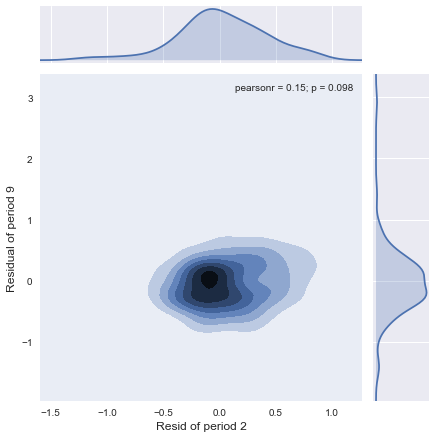

In [27]:
# Create density plot

graph = sns.jointplot(x,y, kind = 'kde')

x_axis = 'Resid of period 2'
y_axis = 'Residual of period 9'

graph.set_axis_labels(x_axis,y_axis, fontsize =12)


### 6.1) Density between residuals of period 8 and period 9

In [28]:
# Intersection of residuals in period 8 and period 9 (may not be the case due to attrition)

matched_identifier = list(set(df_container[8].index) & set(df_container[9].index)) 

In [29]:
# Define values used for the x and y axis
x = df_container[8].loc[matched_identifier]['resid'].values
y = df_container[9].loc[matched_identifier]['resid'].values

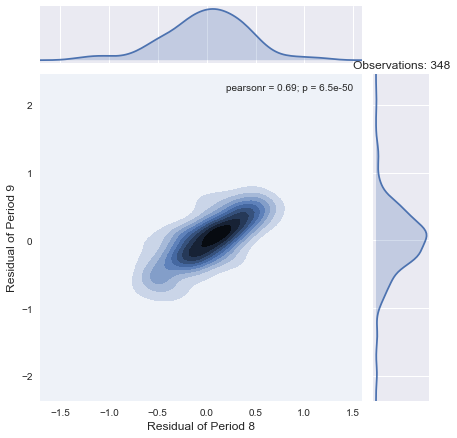

In [30]:
graph = sns.jointplot(x, y, kind = "kde")
x_axis = 'Residual of Period 8'
y_axis = 'Residual of Period 9'
graph.set_axis_labels(x_axis, y_axis, fontsize=12)
sns.plt.title('Observations: ' + str(len(matched_identifier)))

### More information on seaborn jointplots may be found [here](https://seaborn.pydata.org/generated/seaborn.jointplot.html)

# 7) Heatmap

### 7.1) Covariance matrix

In [31]:
cov = np.empty((11,11))
cov[:] = np.nan

column = -1
for period in df_container:
    row = -1
    column += 1
    for lag in df_container:
        row += 1
        matched_identifier = list(set(period.index) & set(lag.index))  
        
        # more than 30 observations:
        if len(matched_identifier) >= 30:
            cov[(row,column)] = round((np.cov(period.loc[matched_identifier]['resid'].values, 
                                 lag.loc[matched_identifier]['resid'].values, rowvar = False, bias = True)[(0,1)]),2)
        else:
            pass

In [32]:
# show coariance
cov

array([[  nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan],
       [  nan,  0.13,  0.08,  0.03,  0.01,  0.03,  0.  ,  0.02, -0.07,
          nan,   nan],
       [  nan,  0.08,  0.17,  0.09,  0.06,  0.04,  0.03,  0.05,  0.02,
         0.03,  0.04],
       [  nan,  0.03,  0.09,  0.15,  0.08,  0.05,  0.04,  0.04,  0.04,
         0.04,  0.05],
       [  nan,  0.01,  0.06,  0.08,  0.16,  0.11,  0.06,  0.07,  0.06,
         0.08,  0.08],
       [  nan,  0.03,  0.04,  0.05,  0.11,  0.15,  0.1 ,  0.09,  0.09,
         0.09,  0.04],
       [  nan,  0.  ,  0.03,  0.04,  0.06,  0.1 ,  0.21,  0.11,  0.09,
         0.09,  0.06],
       [  nan,  0.02,  0.05,  0.04,  0.07,  0.09,  0.11,  0.19,  0.13,
         0.11,  0.08],
       [  nan, -0.07,  0.02,  0.04,  0.06,  0.09,  0.09,  0.13,  0.19,
         0.14,  0.08],
       [  nan,   nan,  0.03,  0.04,  0.08,  0.09,  0.09,  0.11,  0.14,
         0.26,  0.13],
       [  nan,   nan,  0.04,  0.05,  0.08,  0.04,  0.06,  0.

### 7.2) Covariance matrix as a heatmap

#### Result

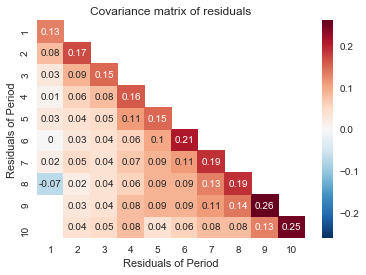

In [33]:
# Heatmap of covariance matrix of residuals

mask = np.zeros_like(cov[1:11,1:11])
mask[np.triu_indices_from(mask, k = 1)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(np.round(cov[1:11,1:11],2),mask=mask,annot=True)

plt.xlabel('Residuals of Period')
plt.ylabel('Residuals of Period')
ax.set_yticklabels(reversed(range(1, 11)))
ax.set_xticklabels(range(1, 11))
plt.title('Covariance matrix of residuals')
plt.savefig('Figures/cov_heatmap.png')

#### Generate the covariance matrix heatmap step by step

1. Plot the covariance matrix in a heatmap
2. Select relevant covariance matrix rows and columns
3. Create a mask to show only covariance triangular matrix below the diagonal
4. Add covariance values to the heatmap
5. Add x axis and y axis names. Add a title.
6. Adjust the counter of the axes
7. Save the figure
8. Change the color to blue

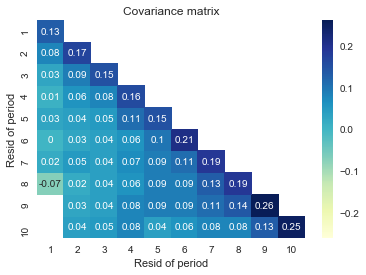

In [34]:
# create the heatmap step by step
mask = np.zeros_like(cov[1:11, 1:11])
mask[np.triu_indices_from(mask, k = 1)] = True
with sns.axes_style('white'):
        ax = sns.heatmap(cov[1:11, 1:11], mask = mask, annot = True, cmap="YlGnBu")
        
plt.title('Covariance matrix')
plt.xlabel('Resid of period')
plt.ylabel('Resid of period')
ax.set_yticklabels(reversed(range(1, 11)))
ax.set_xticklabels(range(1, 11))

plt.savefig('Figures/cov_matrix.png')

### More information on seaborn heatmaps may be found [here](https://seaborn.pydata.org/generated/seaborn.heatmap.html)